## Carga de los módulos

In [5]:
import numpy as np
import pandas as pd

## Lectura de los datos

In [6]:
datos = pd.read_table("data/datosAB.txt", sep='\t')

In [7]:
datos

,a,b,clase
0,168,141,r
1,165,143,r
2,170,143,r
3,172,145,r
4,174,145,r
5,167,147,r
6,174,147,r
7,169,149,r
8,170,150,r
9,164,151,r


## Separación de datos 

In [8]:
X = datos.iloc[:,:-1]
y = datos.iloc[:,2]

In [9]:
y

0     r
1     r
2     r
3     r
4     r
5     r
6     r
7     r
8     r
9     r
10    r
11    r
12    r
13    r
14    r
15    r
16    r
17    r
18    n
19    n
20    n
21    n
22    n
23    n
24    n
25    n
26    n
27    n
28    n
29    n
30    n
31    n
32    n
33    n
34    n
35    n
Name: clase, dtype: object

## Creación de subconjutos CP y CE

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_ce, X_cp, y_ce, y_cp = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
X_ce

,a,b
35,160,143
33,174,168
28,172,164
32,165,168
8,170,150
13,168,154
5,167,147
17,175,162
14,170,156
7,169,149


In [13]:
y_ce

35    n
33    n
28    n
32    n
8     r
13    r
5     r
17    r
14    r
7     r
26    n
1     r
12    r
25    n
24    n
6     r
23    n
4     r
18    n
21    n
19    n
9     r
34    n
3     r
0     r
Name: clase, dtype: object

## Creación del Clasificador LDA

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [15]:
clasificador = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)

## Ajuste

In [16]:
clasificador.fit(X_ce, y_ce)

LinearDiscriminantAnalysis(store_covariance=True)

In [17]:
X_cp

,a,b
31,169,166
20,167,156
16,176,159
30,178,165
22,160,155
15,173,157
10,172,151
2,170,143
11,175,152
29,171,165


## Predicción

In [18]:
y_pred = clasificador.predict(X_cp)

In [19]:
y_pred

array(['n', 'n', 'r', 'n', 'n', 'r', 'r', 'r', 'r', 'n', 'n'], dtype='<U1')

In [20]:
y_cp

31    n
20    n
16    r
30    n
22    n
15    r
10    r
2     r
11    r
29    n
27    n
Name: clase, dtype: object

## Creación de los resultados estadísticos de la clasificación

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
mconf = confusion_matrix(y_cp, y_pred)

In [23]:
mconf

array([[6, 0],
       [0, 5]])

In [24]:
clasificador.score(X_cp, y_cp)

1.0

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
cc = accuracy_score(y_cp, y_pred)

In [27]:
cc

1.0

## Preparación del gráfico 

In [28]:
import matplotlib.pyplot as plt

In [29]:
from matplotlib.colors import ListedColormap

In [30]:
print(y_ce)

35    n
33    n
28    n
32    n
8     r
13    r
5     r
17    r
14    r
7     r
26    n
1     r
12    r
25    n
24    n
6     r
23    n
4     r
18    n
21    n
19    n
9     r
34    n
3     r
0     r
Name: clase, dtype: object


In [31]:
y_ce.size

25

## Ajuste del etiquetado de la variable y

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
labelencoder_y = LabelEncoder()

In [34]:
y_ce = labelencoder_y.fit_transform(y_ce)

In [35]:
print(y_ce)

[0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1]


Nota: Es necesario realizar el ajuste de nuevo dado que cambió la variable y debido al proceso de etiquetado

In [36]:
clasificador.fit(X_ce, y_ce)

LinearDiscriminantAnalysis(store_covariance=True)

In [37]:
X_set, y_set = X_ce, y_ce

In [38]:
X_set

,a,b
35,160,143
33,174,168
28,172,164
32,165,168
8,170,150
13,168,154
5,167,147
17,175,162
14,170,156
7,169,149


In [39]:
y_set

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1])

Creación de la malla (plano cartesiano)

In [40]:
X1, X2 = np.meshgrid(
    np.arange(start = X_set.iloc[:,0].min()-1, stop = X_set.iloc[:,0].max()+1, step=0.1),
    np.arange(start = X_set.iloc[:,1].min()-1, stop = X_set.iloc[:,1].max()+1, step=0.1)
)

## Creación del gráfico

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


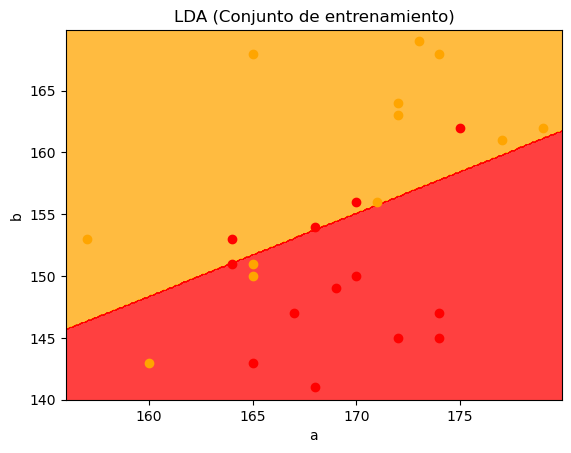

In [41]:
plt.contourf(X1, X2, 
    clasificador.predict(
        np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('orange', 'red'))                
)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

j=0
for i in y_set:
    if i==0:
        color = "orange"
    else:
        color = "red"
    plt.scatter(
        X_set.iloc[j,0],
        X_set.iloc[j,1],
        c = color,
        label = i
    )
    j=j+1

plt.title('LDA (Conjunto de entrenamiento)')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

Es importante notar que los puntos que no se encuentran clasificados correctamente en la gráfica por el LDA, corresponden a aquellos datos del conjunto de entrenamiento que tenían una etiqueta en esa región